<a href="https://colab.research.google.com/github/LinkInWorld/-1.-Hello-World/blob/main/%D0%A2%D1%81%D0%B8%D1%81%D0%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом примере мы будем использовать датасет "Breast Cancer Wisconsin (Diagnostic) Data Set" из репозитория UCI Machine Learning.

Задача: Создать бинарный классификатор для определения доброкачественных (M) и злокачественных (B) опухолей на основе признаков, извлеченных из изображений биопсий.

Датасет: Вы можете скачать датасет по следующей ссылке: Breast Cancer Wisconsin (Diagnostic) Data Set.

После скачивания датасета, вы можете использовать следующий код для создания нейронной сети с помощью библиотеки TensorFlow:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
                "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
                "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

data = pd.read_csv(url, names=column_names)

# Предобработка данных
X = data.iloc[:, 2:]  # Исключаем столбцы "id" и "diagnosis"
y = (data["diagnosis"] == "M").astype(int)  # Преобразуем диагнозы в бинарные значения (1 - злокачественная, 0 - доброкачественная)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # 30 признаков входа
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Выходной слой с сигмоидной функцией активации для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Точность (Accuracy): {accuracy}')
print(f'Матрица ошибок:\n{confusion}')
print(f'Отчет о классификации:\n{classification_rep}')

Epoch 1/10
15/15 [==============================] - 2s 54ms/step - loss: 0.6422 - accuracy: 0.6791 - val_loss: 0.3803 - val_accuracy: 0.9298
Epoch 2/10
15/15 [==============================] - 0s 19ms/step - loss: 0.3222 - accuracy: 0.9363 - val_loss: 0.2136 - val_accuracy: 0.9474
Epoch 3/10
15/15 [==============================] - 0s 19ms/step - loss: 0.1969 - accuracy: 0.9495 - val_loss: 0.1416 - val_accuracy: 0.9561
Epoch 4/10
15/15 [==============================] - 0s 22ms/step - loss: 0.1420 - accuracy: 0.9670 - val_loss: 0.1070 - val_accuracy: 0.9649
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1125 - accuracy: 0.9736 - val_loss: 0.0885 - val_accuracy: 0.9825
Epoch 6/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0937 - accuracy: 0.9802 - val_loss: 0.0777 - val_accuracy: 0.9825
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0819 - accuracy: 0.9846 - val_loss: 0.0711 - val_accuracy: 0.9825
Epoch 8/10
15/

Этот код создает нейронную сеть для бинарной классификации опухолей молочных желез. После обучения модели, она оценивается на тестовых данных, и выводится точность, матрица ошибок и отчет о классификации. Вы можете настроить параметры модели и предобработку данных для достижения лучших результатов.

Построим график ROC-кривой для данной модели с помощью библиотеки matplotlib. График ROC-кривой, поможет оценить качество бинарной классификации и отобразить соотношение между долей объектов от общего количества носителей признака

4/4 [==============================] - 0s 3ms/step


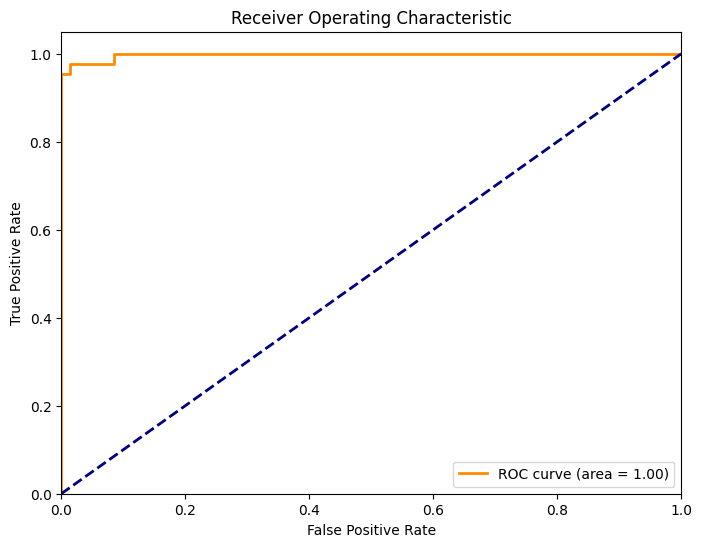

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получение вероятностей принадлежности к классу "1" (злокачественные опухоли)
y_prob = model.predict(X_test)

# Вычисление ROC-кривой и площади под ней (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Построим графики потерь и точности для обучения и валидации в процессе обучения модели и отобразим их на одном графике для наглядности.

Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 0.5850 - accuracy: 0.7231 - val_loss: 0.3946 - val_accuracy: 0.9298
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2992 - accuracy: 0.9363 - val_loss: 0.2278 - val_accuracy: 0.9561
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1881 - accuracy: 0.9451 - val_loss: 0.1526 - val_accuracy: 0.9649
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9516 - val_loss: 0.1199 - val_accuracy: 0.9649
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9626 - val_loss: 0.0999 - val_accuracy: 0.9737
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9736 - val_loss: 0.0881 - val_accuracy: 0.9825
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0834 - accuracy: 0.9780 - val_loss: 0.0812 - val_accuracy: 0.9737
Epoch 8/10
15/15 [=

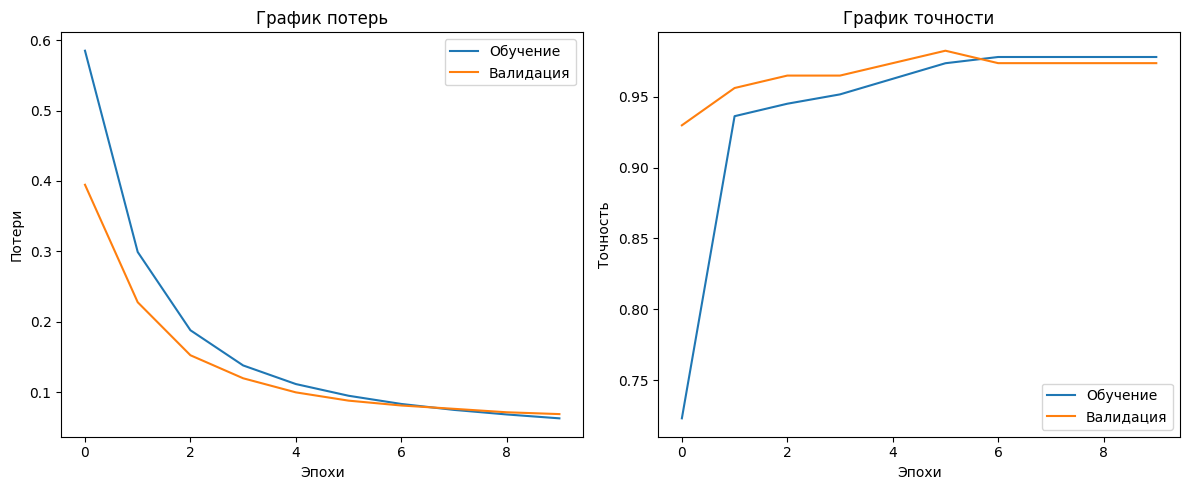

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # 30 признаков входа
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Выходной слой с сигмоидной функцией активации для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание списков для сохранения данных о потерях и точности в процессе обучения
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Точность (Accuracy): {accuracy}')
print(f'Матрица ошибок:\n{confusion}')
print(f'Отчет о классификации:\n{classification_rep}')

# Построение графиков потерь и точности
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Валидация')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

Изменим эпохи в большую сторону и посмотрим на график

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
                "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
                "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]

data = pd.read_csv(url, names=column_names)

# Предобработка данных
X = data.iloc[:, 2:]  # Исключаем столбцы "id" и "diagnosis"
y = (data["diagnosis"] == "M").astype(int)  # Преобразуем диагнозы в бинарные значения (1 - злокачественная, 0 - доброкачественная)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # 30 признаков входа
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Выходной слой с сигмоидной функцией активации для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Точность (Accuracy): {accuracy}')
print(f'Матрица ошибок:\n{confusion}')
print(f'Отчет о классификации:\n{classification_rep}')

Epoch 1/100
15/15 [==============================] - 2s 28ms/step - loss: 0.4885 - accuracy: 0.7758 - val_loss: 0.3170 - val_accuracy: 0.9561
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.2501 - accuracy: 0.9560 - val_loss: 0.1868 - val_accuracy: 0.9649
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1632 - accuracy: 0.9692 - val_loss: 0.1256 - val_accuracy: 0.9649
Epoch 4/100
15/15 [==============================] - 0s 18ms/step - loss: 0.1244 - accuracy: 0.9736 - val_loss: 0.0964 - val_accuracy: 0.9737
Epoch 5/100
15/15 [==============================] - 0s 23ms/step - loss: 0.1028 - accuracy: 0.9758 - val_loss: 0.0836 - val_accuracy: 0.9825
Epoch 6/100
15/15 [==============================] - 0s 21ms/step - loss: 0.0887 - accuracy: 0.9802 - val_loss: 0.0755 - val_accuracy: 0.9825
Epoch 7/100
15/15 [==============================] - 0s 20ms/step - loss: 0.0787 - accuracy: 0.9846 - val_loss: 0.0694 - val_accuracy: 0.9825
Epoch 8/

Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 0.5593 - accuracy: 0.7407 - val_loss: 0.3711 - val_accuracy: 0.9649
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.9582 - val_loss: 0.1983 - val_accuracy: 0.9649
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9560 - val_loss: 0.1264 - val_accuracy: 0.9649
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1354 - accuracy: 0.9604 - val_loss: 0.0971 - val_accuracy: 0.9737
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1105 - accuracy: 0.9736 - val_loss: 0.0821 - val_accuracy: 0.9737
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0944 - accuracy: 0.9780 - val_loss: 0.0742 - val_accuracy: 0.9737
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0836 - accuracy: 0.9780 - val_loss: 0.0693 - val_accuracy: 0.9737
Epoch 8/10
15/15 [=

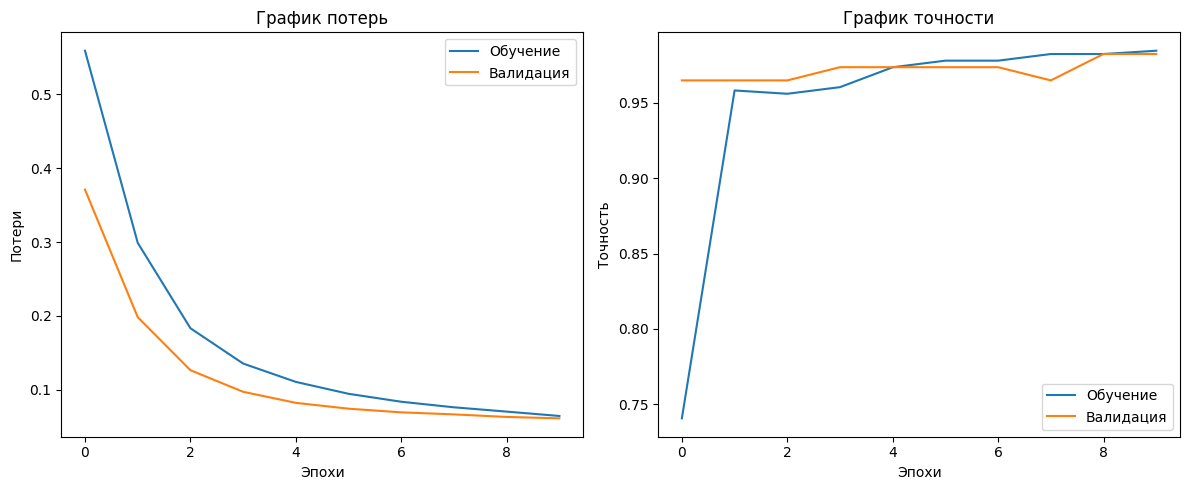

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ...

# Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # 30 признаков входа
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Выходной слой с сигмоидной функцией активации для бинарной классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Создание списков для сохранения данных о потерях и точности в процессе обучения
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Точность (Accuracy): {accuracy}')
print(f'Матрица ошибок:\n{confusion}')
print(f'Отчет о классификации:\n{classification_rep}')

# Построение графиков потерь и точности
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Валидация')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()